In [28]:
# étape 1:Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [29]:
#étape 2: Charger des données
data=pd.read_csv("C:/dataset/Salary_Data.csv")

In [30]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [31]:
#étape 3:préparation des données

In [32]:
#3.a)traiter les valeur manquantes
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [33]:
#3.b)Le traitement des valeurs dupliquées
data.duplicated().sum()

0

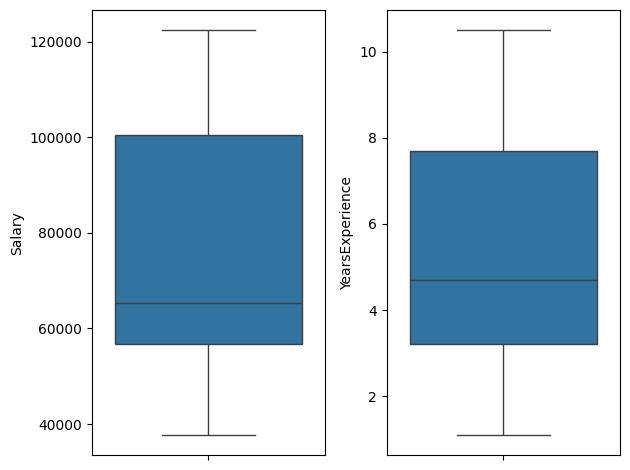

In [34]:
#3.c)Traitement des valeurs aberrantes (Outliers)
f, axes=plt.subplots(1,2)
sns.boxplot(y='Salary', data=data, ax=axes[0])
sns.boxplot(y='YearsExperience', data=data, ax=axes[1])
plt.tight_layout()

In [35]:
#étape 4 (Data Visualisation)

In [36]:
#afficher les dernières lignes de data set
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [37]:
#afficher les premières lignes
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [38]:
#afficher les Informations sur les types de données et les valeurs manquantes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [39]:
#Statistiques descriptives :
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [40]:
#Afficher la nuage des points matplotlib

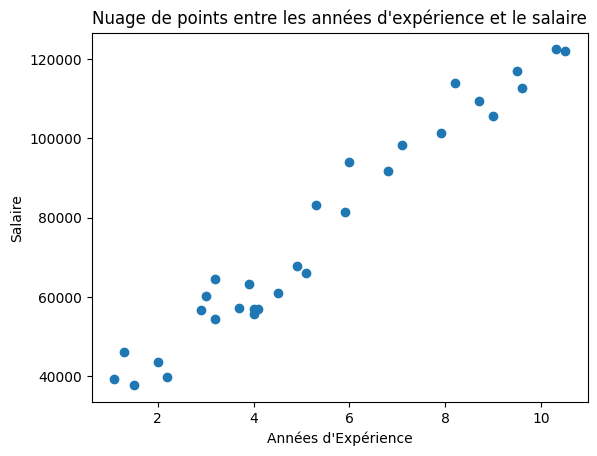

In [41]:
plt.scatter(data['YearsExperience'], data['Salary'])
plt.title('Nuage de points entre les années d\'expérience et le salaire')
plt.xlabel('Années d\'Expérience')
plt.ylabel('Salaire')
plt.show()


In [42]:
#Afficher la nuage des points Pandas

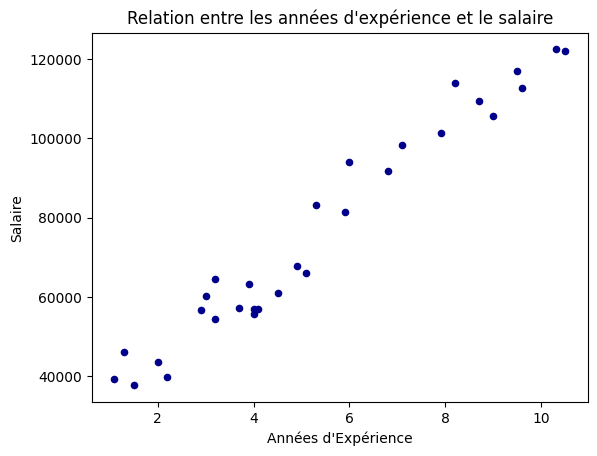

In [43]:
ax = data.plot.scatter(x='YearsExperience', y='Salary', c='DarkBlue', title='Relation entre les années d\'expérience et le salaire')
ax.set_xlabel('Années d\'Expérience')
ax.set_ylabel('Salaire')
plt.show()


In [44]:
#étape 5 :Division data en 2 data sets :traitement *08% et test 20%

In [45]:
X = data[['YearsExperience']].values
Y = data['Salary'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(24, 1)
(6, 1)
(24,)
(6,)


In [46]:
#étape 6:entraîner le modèle

In [47]:
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression()

In [48]:
#étape 7:Prédiction sur les données de test

In [49]:
y_test_pred_lin = lmodellineaire.predict(X_test)
y_test_pred_lin

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

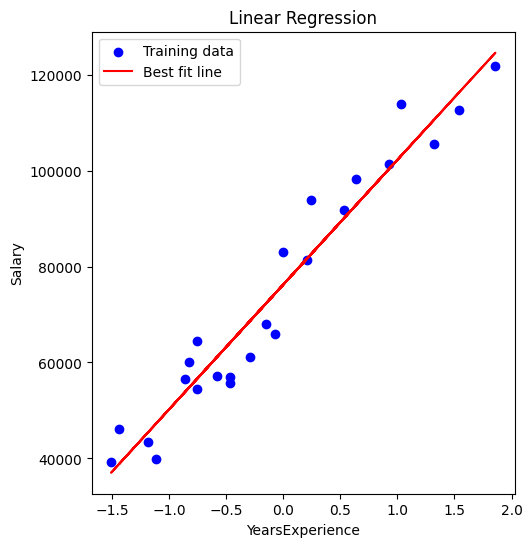

In [50]:
#Visualiser le résultat de la régression sous forme d’un graphe
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train, Y_train, color='blue', label='Training data')
plt.plot(X_train,  lmodellineaire.predict(X_train), color='red', label='Best fit line')
plt.title('Linear Regression')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()

In [51]:
#étape 6:Évaluer le modèle

In [52]:
print('La performance du modèle sur la base dapprentissage')
mse = mean_squared_error(Y_test, y_test_pred_lin)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_test_pred_lin)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


La performance du modèle sur la base dapprentissage
Mean Squared Error (MSE): 12823412.298126549
Root Mean Squared Error (RMSE): 3580.979237321343
Mean Absolute Error (MAE): 2446.1723690465064
